In [1]:
from keras.layers import Input, Dense
from keras.models import Model


encoding_dim = 32


input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0035 - loss: 0.6345 - val_accuracy: 0.0010 - val_loss: 0.4714
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0016 - loss: 0.4504 - val_accuracy: 0.0000e+00 - val_loss: 0.4034
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0059 - loss: 0.3942 - val_accuracy: 0.0070 - val_loss: 0.3755
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0068 - loss: 0.3668 - val_accuracy: 0.0070 - val_loss: 0.3565
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0058 - loss: 0.3490 - val_accuracy: 0.0070 - val_loss: 0.3446


In [3]:
prediction = autoencoder.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


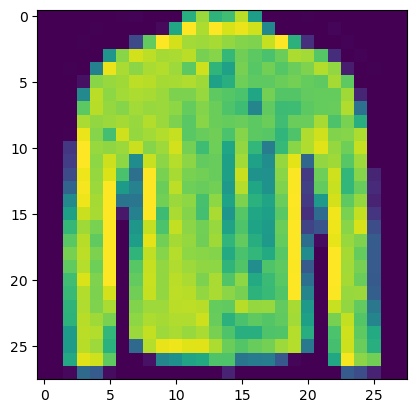

In [4]:
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

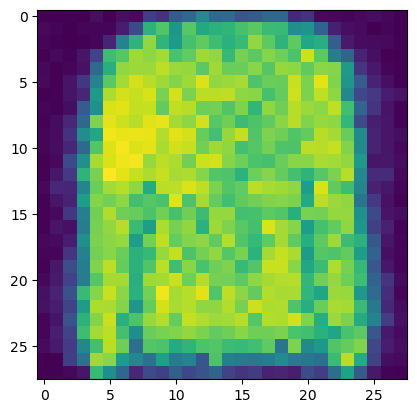

In [5]:
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

In [6]:
input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0095 - loss: 0.3772 - val_accuracy: 0.0191 - val_loss: 0.2930
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0204 - loss: 0.2887 - val_accuracy: 0.0254 - val_loss: 0.2840
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0243 - loss: 0.2809 - val_accuracy: 0.0268 - val_loss: 0.2801
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0280 - loss: 0.2772 - val_accuracy: 0.0298 - val_loss: 0.2780
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0333 - loss: 0.2753 - val_accuracy: 0.0343 - val_loss: 0.2763


In [7]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


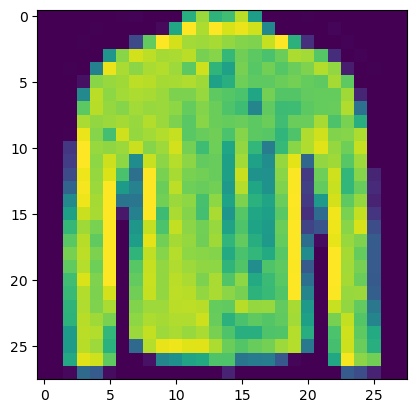

In [8]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

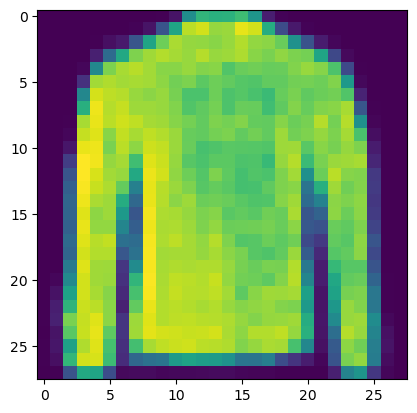

In [9]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

In [10]:
from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
     # this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [11]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [12]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0021 - loss: 0.6704 - val_accuracy: 0.0020 - val_loss: 0.5504
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0022 - loss: 0.5222 - val_accuracy: 0.0020 - val_loss: 0.4543
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0043 - loss: 0.4397 - val_accuracy: 0.0040 - val_loss: 0.4094
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0047 - loss: 0.4072 - val_accuracy: 0.0010 - val_loss: 0.3925
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0090 - loss: 0.3934 - val_accuracy: 0.0020 - val_loss: 0.3804
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0066 - loss: 0.3792 - val_accuracy: 0.0020 - val_loss: 0.3698
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0062 - loss: 0.3712 - val_accuracy: 0.0060 - val_loss: 0.3609
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0063 - loss: 0.3623 - val_accuracy: 0.0050 - val_l

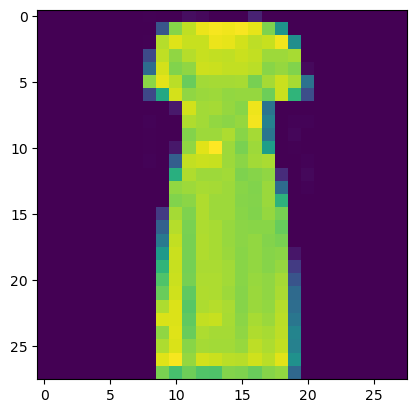

In [13]:
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()

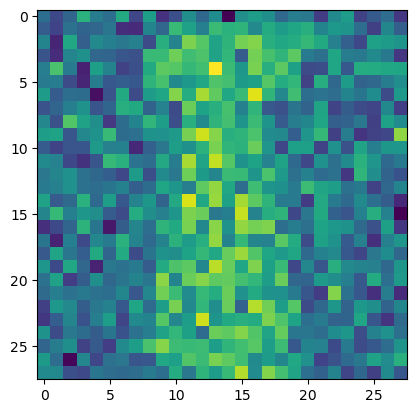

In [14]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()

In [15]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


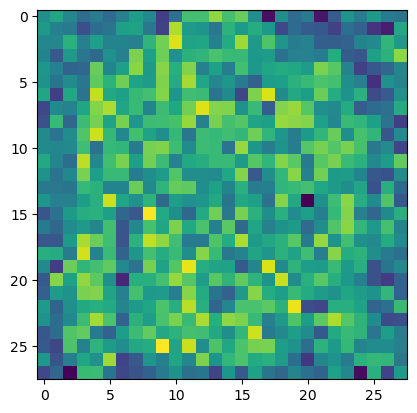

In [16]:
#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()


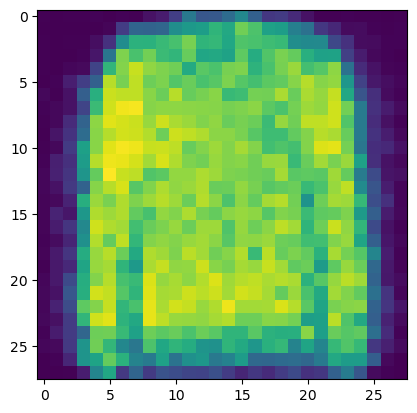

In [17]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

In [18]:
autoencoder.metrics_names


['loss', 'compile_metrics']

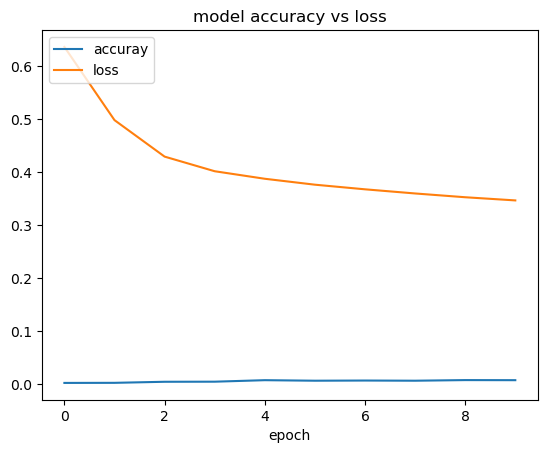

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

